In [112]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [113]:
df = pd.read_csv('imdb_top_250_series_episode_ratings.csv')
df1 = pd.read_csv('imdb_top_250_series_global_ratings.csv')

df = df[['title', 'season', 'episode', 'aggregateRating', 'voteCount', 'releaseDate.day', 'releaseDate.month', 'releaseDate.year', 'series.id']]
df1 = df1[['currentRank', 'node.titleText.text', 'node.titleType.text', 'node.episodes.episodes.total', 'node.releaseYear.year', 'node.releaseYear.endYear', 'node.ratingsSummary.aggregateRating', 'node.ratingsSummary.voteCount', 'node.runtime.seconds', 'node.titleGenres.genres', 'node.id']]
df1

,currentRank,node.titleText.text,node.titleType.text,node.episodes.episodes.total,node.releaseYear.year,node.releaseYear.endYear,node.ratingsSummary.aggregateRating,node.ratingsSummary.voteCount,node.runtime.seconds,node.titleGenres.genres,node.id
0,1,Breaking Bad,TV Series,62,2008,2013.0,9.5,2106387,2700,"[{'genre': {'text': 'Crime', '__typename': 'Ge...",tt0903747
1,2,Planet Earth II,TV Mini Series,6,2016,2016.0,9.5,156311,17880,"[{'genre': {'text': 'Documentary', '__typename...",tt5491994
2,3,Planet Earth,TV Mini Series,11,2006,2006.0,9.4,218687,32280,"[{'genre': {'text': 'Documentary', '__typename...",tt0795176
3,4,Band of Brothers,TV Mini Series,10,2001,2001.0,9.4,518235,35640,"[{'genre': {'text': 'Drama', '__typename': 'Ge...",tt0185906
4,5,Chernobyl,TV Mini Series,5,2019,2019.0,9.3,851248,19800,"[{'genre': {'text': 'Drama', '__typename': 'Ge...",tt7366338
...,...,...,...,...,...,...,...,...,...,...,...
245,246,Alchemy of Souls,TV Series,30,2022,NaN,8.8,16240,4800,"[{'genre': {'text': 'Action', '__typename': 'G...",tt20859920
246,247,Foyle's War,TV Series,28,2002,2015.0,8.6,17922,5400,"[{'genre': {'text': 'Crime', '__typename': 'Ge...",tt0310455
247,248,Alfred Hitchcock Presents,TV Series,268,1955,1962.0,8.5,19155,1500,"[{'genre': {'text': 'Drama', '__typename': 'Ge...",tt0047708
248,249,Sapne Vs Everyone,TV Series,5,2023,NaN,9.5,57621,20700,"[{'genre': {'text': 'Drama', '__typename': 'Ge...",tt30263074


In [114]:
df1['node.runtime.seconds'] = df1['node.runtime.seconds'] / 60

import json

def extract_genre_names(json_str):
    json_list = json.loads(json_str.replace("'", '"'))
    
    genre_names = [item['genre']['text'] for item in json_list]
    
    genre_names_str = ' ,'.join(genre_names)
    return genre_names_str

df1['node.titleGenres.genres'] = df1['node.titleGenres.genres'].apply(extract_genre_names)

In [115]:
# [['title', 'season','episode',	'aggregateRating', 'voteCount', 'releaseDate.day', 'releaseDate.month',	'releaseDate.year',	'series.id']]
data = df.join(
    df1[['currentRank', 'node.titleType.text', 'node.releaseYear.endYear', 'node.ratingsSummary.aggregateRating',	'node.ratingsSummary.voteCount', 'node.runtime.seconds', 'node.titleGenres.genres', 'node.id']].set_index('node.id'), on='series.id'
)
data

,title,season,episode,aggregateRating,voteCount,releaseDate.day,releaseDate.month,releaseDate.year,series.id,currentRank,node.titleType.text,node.releaseYear.endYear,node.ratingsSummary.aggregateRating,node.ratingsSummary.voteCount,node.runtime.seconds,node.titleGenres.genres
0,Breaking Bad,1,1,9.0,42489,20.0,1.0,2008.0,tt0903747,1,TV Series,2013.0,9.5,2106387,45.0,"Crime ,Drama ,Thriller"
1,Breaking Bad,1,2,8.6,31035,27.0,1.0,2008.0,tt0903747,1,TV Series,2013.0,9.5,2106387,45.0,"Crime ,Drama ,Thriller"
2,Breaking Bad,1,3,8.7,30069,10.0,2.0,2008.0,tt0903747,1,TV Series,2013.0,9.5,2106387,45.0,"Crime ,Drama ,Thriller"
3,Breaking Bad,1,4,8.2,28945,17.0,2.0,2008.0,tt0903747,1,TV Series,2013.0,9.5,2106387,45.0,"Crime ,Drama ,Thriller"
4,Breaking Bad,1,5,8.3,28454,24.0,2.0,2008.0,tt0903747,1,TV Series,2013.0,9.5,2106387,45.0,"Crime ,Drama ,Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15603,Generation Kill,1,3,8.3,951,27.0,7.0,2008.0,tt0995832,250,TV Mini Series,2008.0,8.5,58533,70.0,"Drama ,War"
15604,Generation Kill,1,4,8.2,924,3.0,8.0,2008.0,tt0995832,250,TV Mini Series,2008.0,8.5,58533,70.0,"Drama ,War"
15605,Generation Kill,1,5,8.6,932,10.0,8.0,2008.0,tt0995832,250,TV Mini Series,2008.0,8.5,58533,70.0,"Drama ,War"
15606,Generation Kill,1,6,8.3,893,17.0,8.0,2008.0,tt0995832,250,TV Mini Series,2008.0,8.5,58533,70.0,"Drama ,War"


In [116]:
episode_count = data.groupby('title').count()['episode']


numeric_columns = ['aggregateRating', 'node.ratingsSummary.aggregateRating', 'currentRank', 'node.ratingsSummary.voteCount', 'voteCount']
view = data.groupby(['series.id', 'title', 'node.titleType.text'])[numeric_columns].mean().round(1).sort_values('voteCount', ascending=False).copy()

view = view.reset_index()

view = view.join(episode_count, on='title')


df1.set_index('node.id', inplace=True)

columns_to_join = ['node.runtime.seconds', 'node.titleGenres.genres', 'node.releaseYear.year', 'node.releaseYear.endYear']
view = view.join(df1[columns_to_join], on='series.id')


view['url'] = view['series.id'].apply(lambda x: 'https://www.imdb.com/title/'+x)
view


,series.id,title,node.titleType.text,aggregateRating,node.ratingsSummary.aggregateRating,currentRank,node.ratingsSummary.voteCount,voteCount,episode,node.runtime.seconds,node.titleGenres.genres,node.releaseYear.year,node.releaseYear.endYear,url
0,tt3581920,The Last of Us,TV Series,8.7,8.8,80.0,500632.0,80565.0,10,50.0,"Action ,Adventure ,Drama",2023,NaN,https://www.imdb.com/title/tt3581920
1,tt0944947,Game of Thrones,TV Series,8.7,9.2,13.0,2258992.0,58781.1,74,55.0,"Action ,Adventure ,Drama",2011,2019.0,https://www.imdb.com/title/tt0944947
2,tt7366338,Chernobyl,TV Mini Series,9.5,9.3,5.0,851248.0,52849.8,5,330.0,"Drama ,History ,Thriller",2019,2019.0,https://www.imdb.com/title/tt7366338
3,tt2085059,Black Mirror,TV Series,7.6,8.7,75.0,632179.0,45226.2,29,60.0,"Drama ,Mystery ,Sci-Fi",2011,NaN,https://www.imdb.com/title/tt2085059
4,tt0903747,Breaking Bad,TV Series,9.0,9.5,1.0,2106387.0,34995.0,62,45.0,"Crime ,Drama ,Thriller",2008,2013.0,https://www.imdb.com/title/tt0903747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,tt0163507,Whose Line Is It Anyway?,TV Series,7.8,8.5,208.0,46123.0,54.6,220,30.0,"Comedy ,Game-Show",1998,2007.0,https://www.imdb.com/title/tt0163507
246,tt4834232,Critical Role,TV Series,8.2,9.2,135.0,12053.0,48.9,150,180.0,"Adventure ,Fantasy",2015,NaN,https://www.imdb.com/title/tt4834232
247,tt0421291,Avrupa Yakasi,TV Series,7.7,8.6,241.0,20973.0,37.0,190,60.0,Comedy,2004,2009.0,https://www.imdb.com/title/tt0421291
248,tt0053488,The Bugs Bunny Show,TV Series,7.5,8.6,172.0,35512.0,18.0,186,30.0,"Animation ,Comedy",1960,1975.0,https://www.imdb.com/title/tt0053488


In [117]:
data = data[['currentRank', 'title', 'season',	'episode', 'node.titleType.text', 'aggregateRating', 'voteCount','node.ratingsSummary.aggregateRating', 'node.ratingsSummary.voteCount', 'node.runtime.seconds', 'node.titleGenres.genres', 'releaseDate.day', 'releaseDate.month', 'releaseDate.year']].sort_values('currentRank').reset_index(drop=True)
view = view[['currentRank', 'title', 'episode', 'node.titleType.text', 'aggregateRating', 'voteCount', 'node.ratingsSummary.aggregateRating', 'node.ratingsSummary.voteCount', 'node.runtime.seconds', 'node.titleGenres.genres', 'node.releaseYear.year', 'node.releaseYear.endYear', 'url']].sort_values('currentRank').reset_index(drop=True)
view.head().T

,0,1,2,3,4
currentRank,1.0,2.0,3.0,4.0,5.0
title,Breaking Bad,Planet Earth II,Planet Earth,Band of Brothers,Chernobyl
episode,62,6,11,10,5
node.titleType.text,TV Series,TV Mini Series,TV Mini Series,TV Mini Series,TV Mini Series
aggregateRating,9.0,9.0,8.8,9.0,9.5
voteCount,34995.0,3556.5,3104.4,9542.9,52849.8
node.ratingsSummary.aggregateRating,9.5,9.5,9.4,9.4,9.3
node.ratingsSummary.voteCount,2106387.0,156311.0,218687.0,518235.0,851248.0
node.runtime.seconds,45.0,298.0,538.0,594.0,330.0
node.titleGenres.genres,"Crime ,Drama ,Thriller",Documentary,"Documentary ,Family","Drama ,History ,War","Drama ,History ,Thriller"


In [118]:
rename_cols_ep = {
    'currentRank': 'Imdb Rank',
    'title': 'Title',
    'episode': 'Total Episode',
    'node.titleType.text': 'Type',
    'aggregateRating': 'Mean Episode Rating',
    'voteCount': 'Mean Episode Rating Count',
    'node.ratingsSummary.aggregateRating': 'Global Rating',
    'node.ratingsSummary.voteCount': 'Global Rating Count',
    'node.runtime.seconds': 'Duration (min)',
    'node.titleGenres.genres': 'Genres',
    'node.releaseYear.year': 'Start Year',
    'node.releaseYear.endYear': 'End Year'
}
view = view.rename(rename_cols_ep, axis=1)
view.isnull().sum()

Imdb Rank                     0
Title                         0
Total Episode                 0
Type                          0
Mean Episode Rating           0
Mean Episode Rating Count     0
Global Rating                 0
Global Rating Count           0
Duration (min)                0
Genres                        0
Start Year                    0
End Year                     43
url                           0
dtype: int64

In [119]:
view['End Year'] = view['End Year'].fillna(2050)

In [120]:
rename_cols_ep = {
    'currentRank': 'Imdb Rank',
    'title': 'Title',
    'season':'Season',
    'episode': 'Episode',
    'node.titleType.text': 'Type',
    'aggregateRating': 'Episode Rating',
    'voteCount': 'Episode Rating Count',
    'node.ratingsSummary.aggregateRating': 'Global Series Rating',
    'node.ratingsSummary.voteCount': 'Global Rating Count',
    'node.runtime.seconds': 'Duration (min)',
    'node.titleGenres.genres': 'Genres',
    'releaseDate.day': 'Day',
    'releaseDate.month':'Month',
    'releaseDate.year':'Year'
}

data = data.rename(rename_cols_ep, axis=1)
data.isnull().sum()
data

,Imdb Rank,Title,Season,Episode,Type,Episode Rating,Episode Rating Count,Global Series Rating,Global Rating Count,Duration (min),Genres,Day,Month,Year
0,1,Breaking Bad,1,1,TV Series,9.0,42489,9.5,2106387,45.0,"Crime ,Drama ,Thriller",20.0,1.0,2008.0
1,1,Breaking Bad,4,4,TV Series,8.5,22808,9.5,2106387,45.0,"Crime ,Drama ,Thriller",7.0,8.0,2011.0
2,1,Breaking Bad,4,3,TV Series,8.0,24012,9.5,2106387,45.0,"Crime ,Drama ,Thriller",31.0,7.0,2011.0
3,1,Breaking Bad,4,2,TV Series,8.2,23671,9.5,2106387,45.0,"Crime ,Drama ,Thriller",24.0,7.0,2011.0
4,1,Breaking Bad,4,1,TV Series,9.2,28602,9.5,2106387,45.0,"Crime ,Drama ,Thriller",17.0,7.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15603,250,Generation Kill,1,3,TV Mini Series,8.3,951,8.5,58533,70.0,"Drama ,War",27.0,7.0,2008.0
15604,250,Generation Kill,1,6,TV Mini Series,8.3,893,8.5,58533,70.0,"Drama ,War",17.0,8.0,2008.0
15605,250,Generation Kill,1,7,TV Mini Series,8.6,920,8.5,58533,70.0,"Drama ,War",24.0,8.0,2008.0
15606,250,Generation Kill,1,4,TV Mini Series,8.2,924,8.5,58533,70.0,"Drama ,War",3.0,8.0,2008.0


In [121]:
data['Day'] = data['Day'].fillna(35)
data['Month'] = data['Month'].fillna(15)
data['Year'] = data['Year'].fillna(2050)

In [122]:
data['Episode Rating'] = data.groupby('Year')['Episode Rating'].transform(lambda x: x.fillna(round(x.mean(), 1)))
data['Episode Rating'] = data.groupby('Month')['Episode Rating'].transform(lambda x: x.fillna(round(x.mean(), 1)))


In [123]:
data.isnull().sum()

Imdb Rank               0
Title                   0
Season                  0
Episode                 0
Type                    0
Episode Rating          0
Episode Rating Count    0
Global Series Rating    0
Global Rating Count     0
Duration (min)          0
Genres                  0
Day                     0
Month                   0
Year                    0
dtype: int64

In [124]:
data.to_csv('data.csv', index=False)
view.to_csv('view.csv', index=False)

In [125]:
view

,Imdb Rank,Title,Total Episode,Type,Mean Episode Rating,Mean Episode Rating Count,Global Rating,Global Rating Count,Duration (min),Genres,Start Year,End Year,url
0,1.0,Breaking Bad,62,TV Series,9.0,34995.0,9.5,2106387.0,45.0,"Crime ,Drama ,Thriller",2008,2013.0,https://www.imdb.com/title/tt0903747
1,2.0,Planet Earth II,6,TV Mini Series,9.0,3556.5,9.5,156311.0,298.0,Documentary,2016,2016.0,https://www.imdb.com/title/tt5491994
2,3.0,Planet Earth,11,TV Mini Series,8.8,3104.4,9.4,218687.0,538.0,"Documentary ,Family",2006,2006.0,https://www.imdb.com/title/tt0795176
3,4.0,Band of Brothers,10,TV Mini Series,9.0,9542.9,9.4,518235.0,594.0,"Drama ,History ,War",2001,2001.0,https://www.imdb.com/title/tt0185906
4,5.0,Chernobyl,5,TV Mini Series,9.5,52849.8,9.3,851248.0,330.0,"Drama ,History ,Thriller",2019,2019.0,https://www.imdb.com/title/tt7366338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246.0,Alchemy of Souls,30,TV Series,8.7,349.6,8.8,16240.0,80.0,"Action ,Drama ,Fantasy",2022,2050.0,https://www.imdb.com/title/tt20859920
246,247.0,Foyle's War,28,TV Series,8.3,653.2,8.6,17922.0,90.0,"Crime ,Drama ,Mystery",2002,2015.0,https://www.imdb.com/title/tt0310455
247,248.0,Alfred Hitchcock Presents,268,TV Series,7.1,605.7,8.5,19155.0,25.0,"Drama ,Mystery",1955,1962.0,https://www.imdb.com/title/tt0047708
248,249.0,Sapne Vs Everyone,5,TV Series,9.7,4998.0,9.5,57621.0,345.0,Drama,2023,2050.0,https://www.imdb.com/title/tt30263074


In [126]:
data

,Imdb Rank,Title,Season,Episode,Type,Episode Rating,Episode Rating Count,Global Series Rating,Global Rating Count,Duration (min),Genres,Day,Month,Year
0,1,Breaking Bad,1,1,TV Series,9.0,42489,9.5,2106387,45.0,"Crime ,Drama ,Thriller",20.0,1.0,2008.0
1,1,Breaking Bad,4,4,TV Series,8.5,22808,9.5,2106387,45.0,"Crime ,Drama ,Thriller",7.0,8.0,2011.0
2,1,Breaking Bad,4,3,TV Series,8.0,24012,9.5,2106387,45.0,"Crime ,Drama ,Thriller",31.0,7.0,2011.0
3,1,Breaking Bad,4,2,TV Series,8.2,23671,9.5,2106387,45.0,"Crime ,Drama ,Thriller",24.0,7.0,2011.0
4,1,Breaking Bad,4,1,TV Series,9.2,28602,9.5,2106387,45.0,"Crime ,Drama ,Thriller",17.0,7.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15603,250,Generation Kill,1,3,TV Mini Series,8.3,951,8.5,58533,70.0,"Drama ,War",27.0,7.0,2008.0
15604,250,Generation Kill,1,6,TV Mini Series,8.3,893,8.5,58533,70.0,"Drama ,War",17.0,8.0,2008.0
15605,250,Generation Kill,1,7,TV Mini Series,8.6,920,8.5,58533,70.0,"Drama ,War",24.0,8.0,2008.0
15606,250,Generation Kill,1,4,TV Mini Series,8.2,924,8.5,58533,70.0,"Drama ,War",3.0,8.0,2008.0


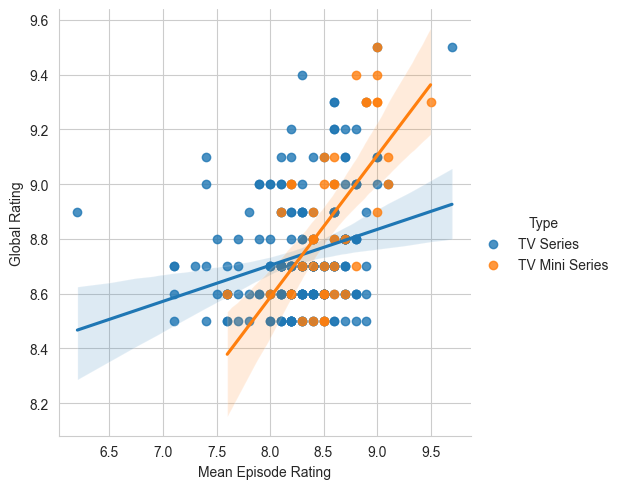

In [144]:
sns.set_style('whitegrid')
g = sns.lmplot(
    data=view,
    x="Mean Episode Rating", y="Global Rating", hue="Type"
)


([<matplotlib.patches.Wedge at 0x14ca8aa0560>,
 [Text(0.9572021068588936, 0.5420001168126214, 'TV Mini Series'),
  Text(-0.9572019948642675, -0.5420003146012621, 'TV Series')],
 [Text(0.5221102401048511, 0.2956364273523389, '16.4%'),
  Text(-0.5221101790168731, -0.295636535237052, '83.6%')])

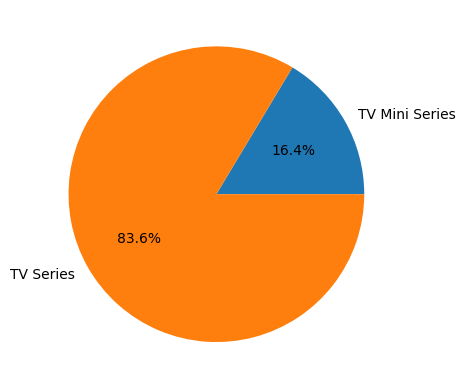

In [138]:
dct = view.groupby('Type')['Type'].count().to_dict()
fig, ax =plt.subplots()

ax.pie(list(dct.values()), labels=list(dct.keys()), autopct='%1.1f%%')

In [ ]:
# fig = px.bar(
#     view.head(15).sort_values('Mean Episode Rating'),
#     y='Title',
#     x=['Global Rating', 'Mean Episode Rating'],
#     barmode='group',
#     hover_data=['IMDb Rank', 'Global Rating Count', 'Total Episode', 'url'],
#     title='IMDb Rating vs Mean Episode Rating'
# )
# fig.update_xaxes(
#     range=[8, 10],
#     title='Rating'
# )
# fig.show()

len(set(view['Start Year'].tolist()))


48

In [ ]:
lst = view['Genres'].tolist()
genres = []
for i in lst:
    genres += i.split(' ,')
genres = set(genres)
len(genres)

26